# Cleaning Oscar Dataset

2.380281690140845
1.5224913494809689
2.5
1.7708333333333333
2.25
1.4479166666666667
2.875
2.2083333333333335
2.5833333333333335
1.9539473684210527
38.0


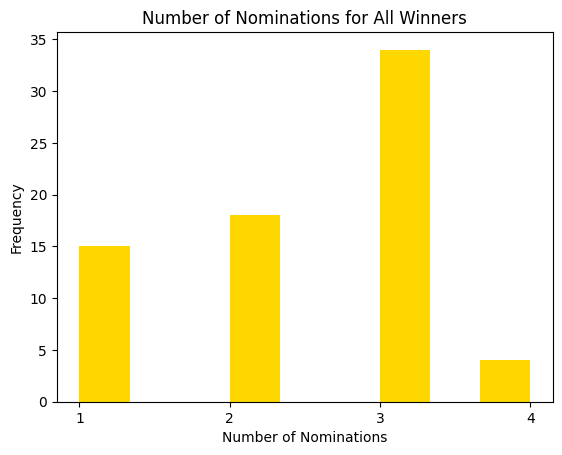

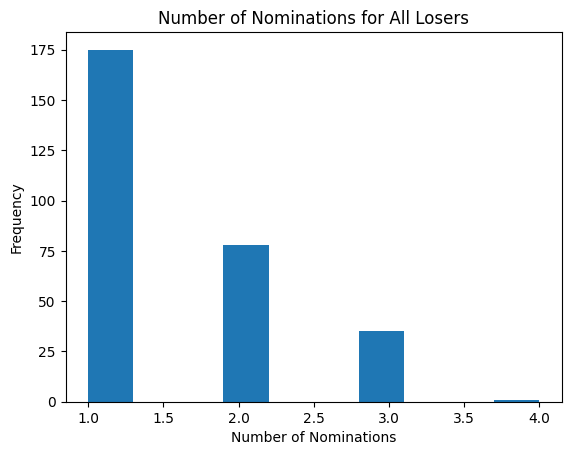

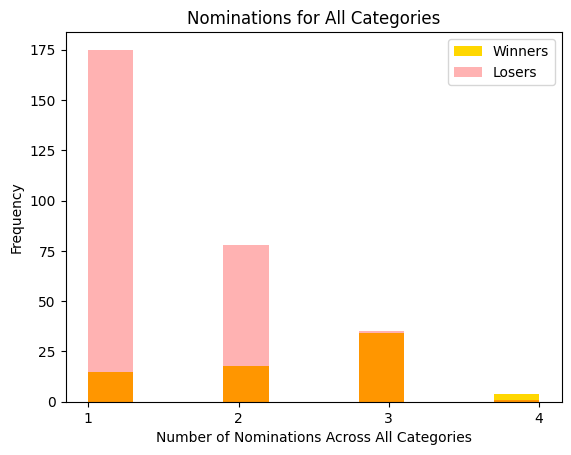

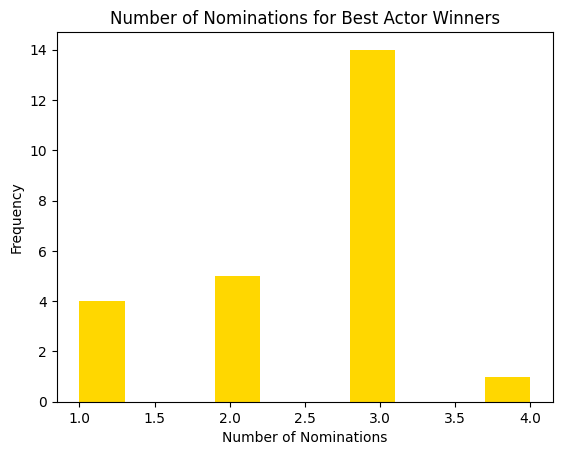

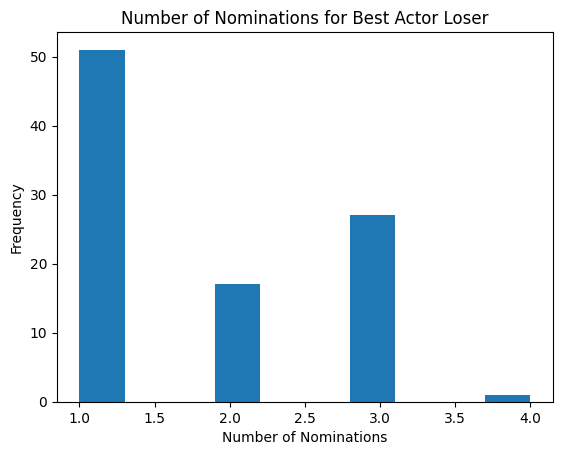

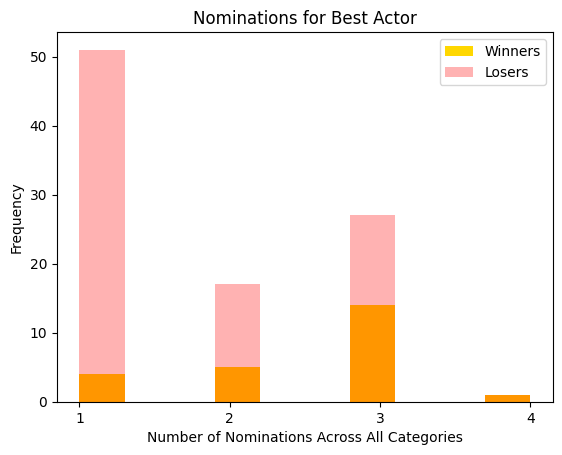

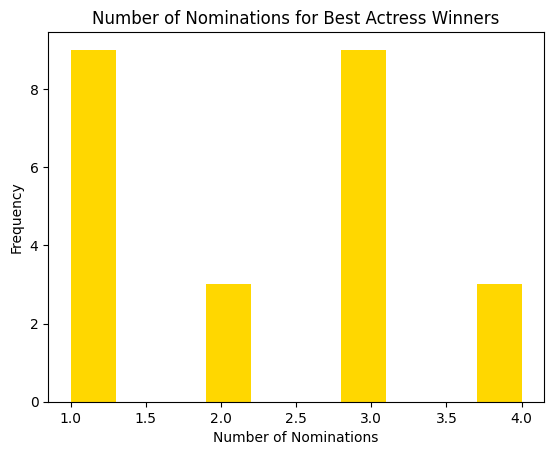

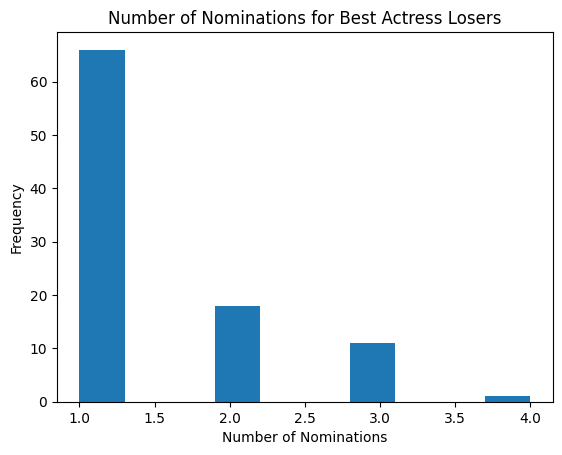

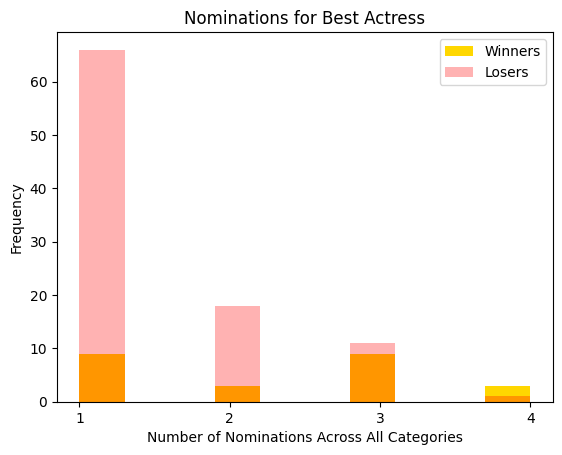

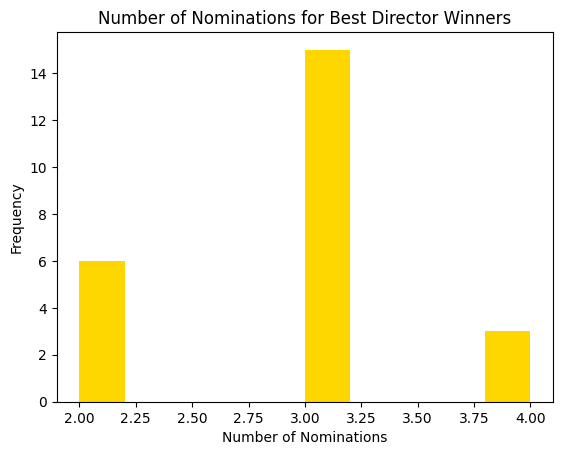

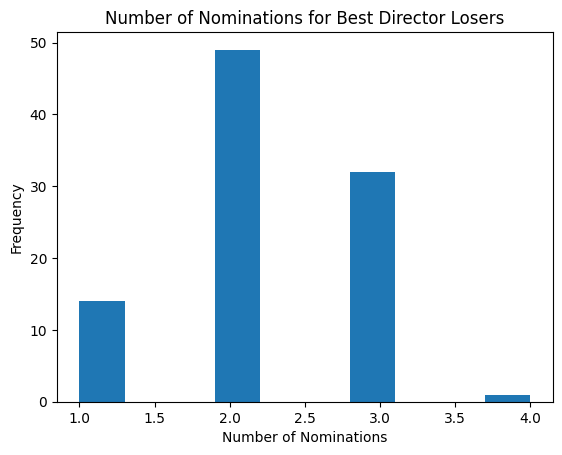

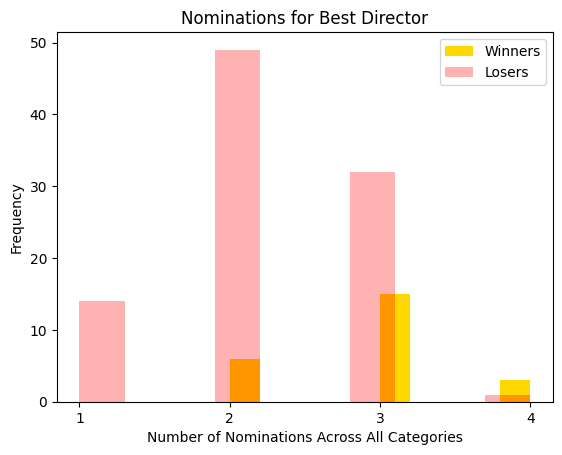

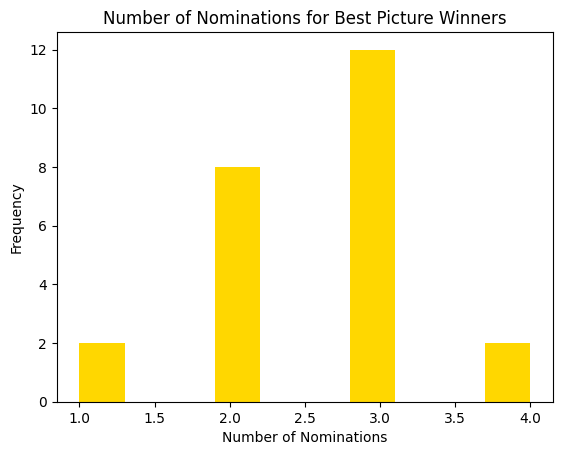

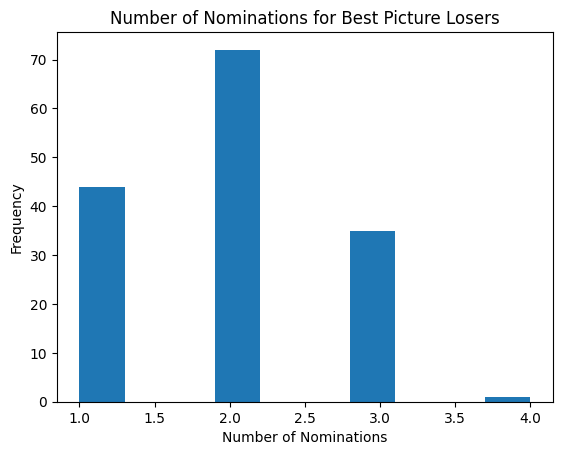

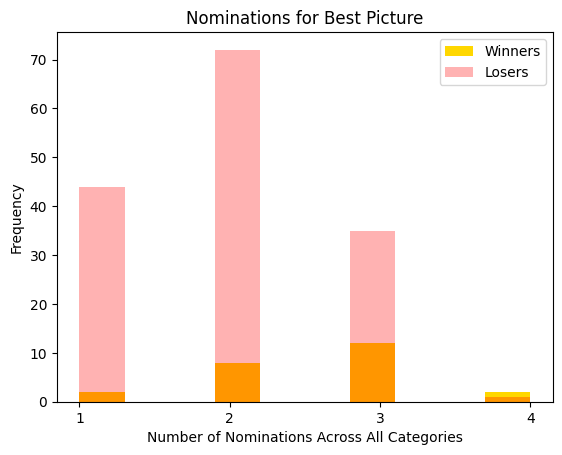

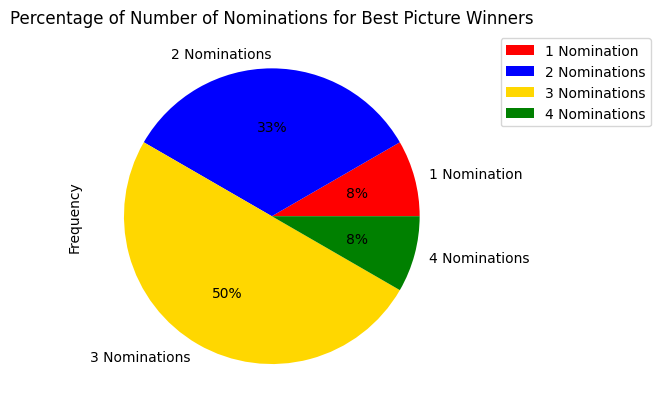

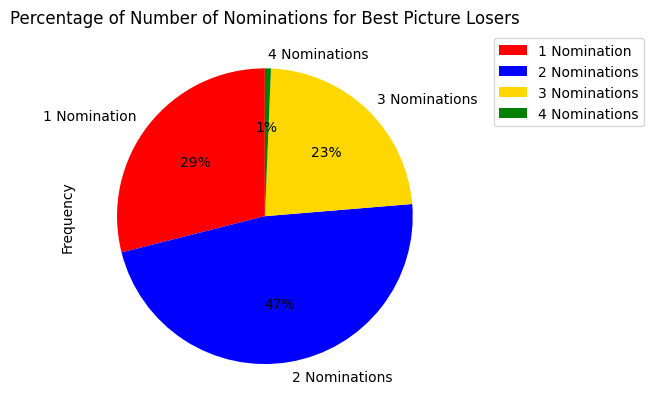

In [87]:
#importing numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#loading in csv
all = pd.read_csv('All awards Oscar Data.csv')
df = pd.DataFrame(all)

#selecting data only from 2000 and onwards
data = pd.DataFrame(df[(df['year_ceremony'] >= 2000)])

#removing extraneous data of year film was released and ceremony number
data = data.drop(columns=['year_film', 'ceremony','name'])
data = data.drop(data[data['category'] == 'ART DIRECTION'].index)
data = data.drop(data[data['category'] == 'ACTOR IN A SUPPORTING ROLE'].index)
data = data.drop(data[data['category'] == 'ACTRESS IN A SUPPORTING ROLE'].index)
data = data.drop(data[data['category'] == 'ANIMATED FEATURE FILM'].index)
data = data.drop(data[data['category'] == 'CINEMATOGRAPHY'].index)
data = data.drop(data[data['category'] == 'COSTUME DESIGN'].index)
data = data.drop(data[data['category'] == 'DOCUMENTARY (Feature)'].index)
data = data.drop(data[data['category'] == 'DOCUMENTARY (Short Subject)'].index)
data = data.drop(data[data['category'] == 'FILM EDITING'].index)
data = data.drop(data[data['category'] == 'FOREIGN LANGUAGE FILM'].index)
data = data.drop(data[data['category'] == 'MAKEUP AND HAIRSTYLING'].index)
data = data.drop(data[data['category'] == 'MAKEUP'].index)
data = data.drop(data[data['category'] == 'MUSIC (Original Score)'].index)
data = data.drop(data[data['category'] == 'MUSIC (Original Song)'].index)
data = data.drop(data[data['category'] == 'PRODUCTION DESIGN'].index)
data = data.drop(data[data['category'] == 'SHORT FILM (Animated)'].index)
data = data.drop(data[data['category'] == 'SHORT FILM (Live Action)'].index)
data = data.drop(data[data['category'] == 'SOUND'].index)
data = data.drop(data[data['category'] == 'SOUND EDITING'].index)
data = data.drop(data[data['category'] == 'SOUND MIXING'].index)
data = data.drop(data[data['category'] == 'VISUAL EFFECTS'].index)
data = data.drop(data[data['category'] == 'WRITING (Adapted Screenplay)'].index)
data = data.drop(data[data['category'] == 'WRITING (Original Screenplay)'].index)
data = data.drop(data[data['category'] == 'WRITING (Screenplay Written Directly for the Screen)'].index)
data = data.drop(data[data['category'] == 'WRITING (Screenplay Based on Material Previously Produced or Published)'].index)



#couting nominations with NO WINS in our selected categories
all_actor_nom = pd.DataFrame(data[(data['winner'] == False) & (data['category'] == 'ACTOR IN A LEADING ROLE')])
all_actress_nom = pd.DataFrame(data[(data['winner'] == False) & (data['category'] == 'ACTRESS IN A LEADING ROLE')])
all_pic_nom = pd.DataFrame(data[(data['winner'] == False) & (data['category'] == 'BEST PICTURE')])
all_director_nom = pd.DataFrame(data[(data['winner'] == False) & (data['category'] == 'DIRECTING')])

#putting all nominees (NO WINS) in one dataframe and sorting by year
temp = [all_actor_nom, all_actress_nom, all_pic_nom, all_director_nom]
nominees_work = pd.DataFrame(pd.concat(temp))
nominess_work= nominees_work.sort_values(by=['year_ceremony'])


#finding winners of our chosen categories
best_actor = pd.DataFrame(data[(data['winner'] == True) & (data['category'] == 'ACTOR IN A LEADING ROLE')])
best_actress = pd.DataFrame(data[(data['winner'] == True) & (data['category'] == 'ACTRESS IN A LEADING ROLE')])
best_pic = pd.DataFrame(data[(data['winner'] == True) & (data['category'] == 'BEST PICTURE')])
best_director = pd.DataFrame(data[(data['winner'] == True) & (data['category'] == 'DIRECTING')])

#putting all winners in one dataframe and sorting by year
frame = [best_actor, best_actress, best_pic, best_director]
winners = pd.DataFrame(pd.concat(frame))
winners = winners.sort_values(by=['year_ceremony'])


#finding how many times winners won in total
win_count = pd.DataFrame(winners['film'].value_counts())

#merging total noms and wins into one dataframe
all_nom = pd.DataFrame(data['film'].value_counts()) # this isn't actually needed we can clean this one up later
win_nom = pd.DataFrame(all_nom.merge(win_count, on='film', how='left'))
win_nom = win_nom.dropna()
win_nom = win_nom.astype(int)
win_nom.columns = [ 'nominations', 'wins']

#removing films that have won from nominees category
nom_tuples = set(nominees_work.apply(tuple, axis=1))
win_tuples = set(winners.apply(tuple, axis=1))
filter_nom = nom_tuples - win_tuples
nominees = pd.DataFrame(list(filter_nom), columns=nominees_work.columns)
nominees = nominees.sort_values(by=['year_ceremony'])
nominees

#counting total number of nominations for NON WINNERS
just_nom = pd.DataFrame(nominees['film'].value_counts())
just_nom.columns = [ 'nominations']

#creating a histogram on total winners and analysis
win_nom.hist('nominations', color='gold', bins='rice')
plt.xlabel('Number of Nominations')
plt.ylabel('Frequency')
plt.title('Number of Nominations for All Winners')
plt.grid(False)
plt.xticks([1,2,3,4])
win_all_avg = win_nom['nominations'].mean()
print(win_all_avg)

#creating a histogram of movies that were only total nominated and analysis
just_nom.hist('nominations')
plt.xlabel('Number of Nominations')
plt.ylabel('Frequency')
plt.title('Number of Nominations for All Losers')
plt.grid(False)
nom_all_avg = just_nom['nominations'].mean()
print(nom_all_avg)

win_count = win_nom.drop('wins', axis=1)
win_count

#combining winning and losing across all categories
win_count.hist('nominations', color = 'gold', label = 'Winners')
plt.hist(just_nom, alpha = 0.3, color = 'red' ,label ='Losers')
plt.legend(loc = 'upper right')
plt.xticks(np.arange(1,5))
plt.title('Nominations for All Categories')
plt.grid(False)
plt.xlabel('Number of Nominations Across All Categories')
plt.ylabel('Frequency')

##ACTORS
#number of nominations for best actor winners
win_actor = pd.DataFrame(best_actor)
win_actor = win_actor.sort_values(by=['year_ceremony'])

#finding how many times winners won in actor
actor_win_count = pd.DataFrame(win_actor['film'].value_counts())

#merging actor noms and wins into one dataframe
actor_win_nom = pd.DataFrame(all_nom.merge(actor_win_count, on='film', how='left'))
actor_win_nom = actor_win_nom.dropna()
actor_win_nom = actor_win_nom.astype(int)
actor_win_nom.columns = [ 'nominations', 'wins']

#creating a histogram on best actor winners and analysis
actor_win_nom.hist('nominations', color='gold')
plt.xlabel('Number of Nominations')
plt.ylabel('Frequency')
plt.title('Number of Nominations for Best Actor Winners')
plt.grid(False)
actor_win_avg = actor_win_nom['nominations'].mean()
print(actor_win_avg)

#finding just best actor losers 
actor_some_nom = pd.DataFrame(nominees.drop(nominees[nominees['category'] != 'ACTOR IN A LEADING ROLE'].index))
actor_nom = pd.DataFrame(nominees.merge(actor_some_nom, on='film'))
actor_nom_count = pd.DataFrame(actor_nom['film'].value_counts())
actor_nom_count.columns = ['nominations']
actor_nom_count
actor_some_nom = pd.DataFrame(nominees.drop(nominees[nominees['category'] != 'ACTOR IN A LEADING ROLE'].index))
actor_nom = pd.DataFrame(nominees.merge(actor_some_nom, on='film'))
actor_nom_count = pd.DataFrame(actor_nom['film'].value_counts())
actor_nom_count.columns = ['nominations']
actor_nom_count

#creating a histogram on best actor losers and analysis
actor_nom_count.hist('nominations')
plt.xlabel('Number of Nominations')
plt.ylabel('Frequency')
plt.grid(False)
plt.title('Number of Nominations for Best Actor Loser')
actor_nom_avg = actor_nom_count['nominations'].mean()
print(actor_nom_avg)

actor_win_count = actor_win_nom.drop('wins', axis=1)
actor_win_count

#combining winning and losing across the actor category
actor_win_count.hist('nominations', color = 'gold', label = 'Winners')
plt.hist(actor_nom_count, alpha = 0.3, color = 'red' ,label ='Losers')
plt.legend(loc = 'upper right')
plt.xticks(np.arange(1,5))
plt.title('Nominations for Best Actor')
plt.grid(False)
plt.xlabel('Number of Nominations Across All Categories')
plt.ylabel('Frequency')

##ACTRESSES

#number of nominations for best actress winners
win_actress = pd.DataFrame(best_actress)
win_actress = win_actress.sort_values(by=['year_ceremony'])

#finding how many times winners won in actress
actress_win_count = pd.DataFrame(win_actress['film'].value_counts())

#merging actress noms and wins into one dataframe
actress_win_nom = pd.DataFrame(all_nom.merge(actress_win_count, on='film', how='left'))
actress_win_nom = actress_win_nom.dropna()
actress_win_nom = actress_win_nom.astype(int)
actress_win_nom.columns = [ 'nominations', 'wins']

#creating a histogram on best actress winners and analysis
actress_win_nom.hist('nominations', color='gold')
plt.xlabel('Number of Nominations')
plt.ylabel('Frequency')
plt.grid(False)
plt.title('Number of Nominations for Best Actress Winners')
actress_win_avg = actress_win_nom['nominations'].mean()
print(actress_win_avg)

#finding just best actress losers 
actress_some_nom = pd.DataFrame(nominees.drop(nominees[nominees['category'] != 'ACTRESS IN A LEADING ROLE'].index))
actress_nom = pd.DataFrame(nominees.merge(actress_some_nom, on='film'))
actress_nom_count = pd.DataFrame(actress_nom['film'].value_counts())
actress_nom_count.columns = ['nominations']

#creating a histogram on best actress losers and analysis
actress_nom_count.hist('nominations')
plt.xlabel('Number of Nominations')
plt.ylabel('Frequency')
plt.grid(False)
plt.title('Number of Nominations for Best Actress Losers')
actress_nom_avg = actress_nom_count['nominations'].mean()
print(actress_nom_avg)

actress_win_count = actress_win_nom.drop('wins', axis=1)
actress_win_count

#combining winning and losing across the actress category
actress_win_count.hist('nominations', color = 'gold', label = 'Winners')
plt.hist(actress_nom_count, alpha = 0.3, color = 'red' ,label ='Losers')
plt.legend(loc = 'upper right')
plt.xticks(np.arange(1,5))
plt.title('Nominations for Best Actress')
plt.grid(False)
plt.xlabel('Number of Nominations Across All Categories')
plt.ylabel('Frequency')

##BEST DIRECTOR

#number of nominations for best director winners
dir_pic = pd.DataFrame(best_director)
dir_pic = dir_pic.sort_values(by=['year_ceremony'])

#finding how many times winners won in director
dir_win_count = pd.DataFrame(dir_pic['film'].value_counts())

#merging director noms and wins into one dataframe
dir_win_nom = pd.DataFrame(all_nom.merge(dir_win_count, on='film', how='left'))
dir_win_nom = dir_win_nom.dropna()
dir_win_nom = dir_win_nom.astype(int)
dir_win_nom.columns = [ 'nominations', 'wins']

#creating a histogram on best director winners and analysis
dir_win_nom.hist('nominations', color='gold')
plt.xlabel('Number of Nominations')
plt.ylabel('Frequency')
plt.grid(False)
plt.title('Number of Nominations for Best Director Winners')
dir_win_avg = dir_win_nom['nominations'].mean()
print(dir_win_avg)

#finding just best director losers 
dir_some_nom = pd.DataFrame(nominees.drop(nominees[nominees['category'] != 'DIRECTING'].index))
dir_nom = pd.DataFrame(nominees.merge(dir_some_nom, on='film'))
dir_nom_count = pd.DataFrame(dir_nom['film'].value_counts())
dir_nom_count.columns = ['nominations']

#creating a histogram on best director losers and analysis
dir_nom_count.hist('nominations')
plt.xlabel('Number of Nominations')
plt.ylabel('Frequency')
plt.grid(False)
plt.title('Number of Nominations for Best Director Losers')
dir_nom_avg = dir_nom_count['nominations'].mean()
print(dir_nom_avg)


dir_win_count = dir_win_nom.drop('wins', axis=1)
dir_win_count

#combining winning and losing across the directing category
dir_win_count.hist('nominations', color = 'gold', label = 'Winners')
plt.hist(dir_nom_count, alpha = 0.3, color = 'red' ,label ='Losers')
plt.legend(loc = 'upper right')
plt.xticks(np.arange(1,5))
plt.title('Nominations for Best Director')
plt.grid(False)
plt.xlabel('Number of Nominations Across All Categories')
plt.ylabel('Frequency')

##BEST PICTURE

#number of nominations for best picture winners
win_pic = pd.DataFrame(best_pic)
win_pic = win_pic.sort_values(by=['year_ceremony'])

#finding how many times winners won in picture
pic_win_count = pd.DataFrame(win_pic['film'].value_counts())

#merging picture noms and wins into one dataframe
pic_win_nom = pd.DataFrame(all_nom.merge(pic_win_count, on='film', how='left'))
pic_win_nom = pic_win_nom.dropna()
pic_win_nom = pic_win_nom.astype(int)
pic_win_nom.columns = [ 'nominations', 'wins']

#creating a histogram on best picture winners and analysis
pic_win_nom.hist('nominations', color='gold')
plt.xlabel('Number of Nominations')
plt.ylabel('Frequency')
plt.grid(False)
plt.title('Number of Nominations for Best Picture Winners')
pic_win_avg = pic_win_nom['nominations'].mean()
print(pic_win_avg)

#finding just best picture losers 
pic_some_nom = pd.DataFrame(nominees.drop(nominees[nominees['category'] != 'BEST PICTURE'].index))
pic_nom = pd.DataFrame(nominees.merge(pic_some_nom, on='film'))
pic_nom_count = pd.DataFrame(pic_nom['film'].value_counts())
pic_nom_count.columns = ['nominations']

#creating a histogram on best picture losers and analysis
pic_nom_count.hist('nominations')
plt.xlabel('Number of Nominations')
plt.ylabel('Frequency')
plt.grid(False)
plt.title('Number of Nominations for Best Picture Losers')
pic_nom_avg = pic_nom_count['nominations'].mean()
print(pic_nom_avg)

pic_win_count = pic_win_nom.drop('wins', axis=1)
pic_win_count

#combining winning and losing across the best picture category
pic_win_count.hist('nominations', color = 'gold', label = 'Winners')
plt.hist(pic_nom_count, alpha = 0.3, color = 'red' ,label ='Losers')
plt.legend(loc = 'upper right')
plt.xticks(np.arange(1,5))
plt.title('Nominations for Best Picture')
plt.grid(False)
plt.xlabel('Number of Nominations Across All Categories')
plt.ylabel('Frequency')


pic_nom_freq = pd.DataFrame(pic_nom_count['nominations'].value_counts())
pic_win_freq = pic_win_count['nominations'].value_counts()


#creating a pie chart for distribution of number of nominations for winners
plt.figure()
win_labels = ['1 Nomination', '2 Nominations', '3 Nominations', '4 Nominations']
pic_win_freq.groupby(['nominations']).sum().plot(kind='pie', y='count', autopct='%1.0f%%', colors = ['red', 'blue', 'gold', 'green'], labels = win_labels, startangle = 0)
plt.ylabel('Frequency')
#plt.legend(loc='lower right')
plt.legend(bbox_to_anchor=(1.1, 1), loc="upper left")
plt.title('Percentage of Number of Nominations for Best Picture Winners')


#creating a pie chart for distribution of number of nominations for losers
nom_labels = ['1 Nomination', '2 Nominations', '3 Nominations', '4 Nominations']
pic_nom_freq.groupby(['nominations']).sum().plot(kind='pie', y='count', autopct='%1.0f%%', colors = ['red', 'blue', 'gold', 'green'], labels = nom_labels, startangle = 90)
plt.ylabel('Frequency')
#plt.legend(loc='lower right')
plt.legend(bbox_to_anchor=(1.1, 1), loc="upper left")
plt.title('Percentage of Number of Nominations for Best Picture Losers')

#running statistics on best picture nomination data


In [8]:
#win_nom['nominations not won'] = win_nom['nominations'] - win_nom['wins']
#print(win_nom.mean())
#counting total number of times a film was nominated
all_nom = pd.DataFrame(data['film'].value_counts())

just_nom = pd.DataFrame(all_nom.merge(win_count, on='film', how='left'))
just_nom.columns = [ 'nominations', 'wins']
just_nom = just_nom.loc[~just_nom['wins'].notna(), :]

,year_ceremony,category,film,winner
405,2000,ACTOR IN A LEADING ROLE,Sweet and Lowdown,False
70,2000,ACTRESS IN A LEADING ROLE,American Beauty,False
157,2000,DIRECTING,Being John Malkovich,False
280,2000,BEST PICTURE,The Sixth Sense,False
391,2000,ACTOR IN A LEADING ROLE,The Insider,False
...,...,...,...,...
38,2023,BEST PICTURE,Avatar: The Way of Water,False
281,2023,DIRECTING,Tár,False
255,2023,BEST PICTURE,Elvis,False
241,2023,ACTRESS IN A LEADING ROLE,Blonde,False


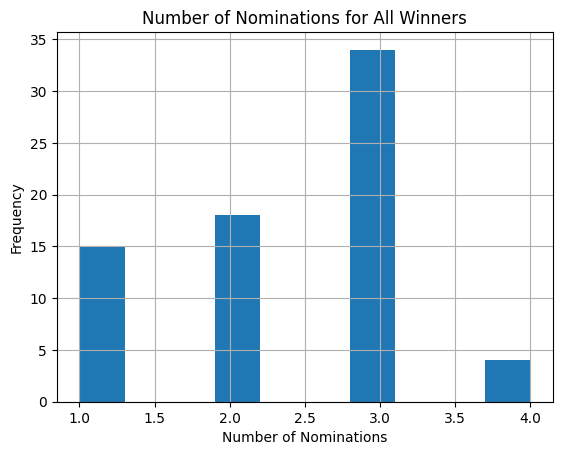

In [2]:
#performing analysis on total winners

win_nom.hist('nominations')
plt.xlabel('Number of Nominations')
plt.ylabel('Frequency')
plt.title('Number of Nominations for All Winners')


#print(just_nom.mean())

#creating a dataframe of best directors and number of nominations
dir_win = pd.DataFrame(all_nom.merge(best_director, on='film', how='left'))
dir_win = dir_win.dropna(subset=["category"])

actor_nom_tuples = set(all_actor_nom.apply(tuple, axis=1))
actor_win_tuples = set(best_actor.apply(tuple, axis=1))
filter_actor = actor_nom_tuples - actor_win_tuples
actor_nom = pd.DataFrame(list(filter_nom), columns=all_actor_nom.columns)
actor_nom = actor_nom.sort_values(by=['year_ceremony'])
actor_nom


# 